In [3]:
# Load in the data wrangling Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [71]:
mp = pd.read_csv('../data/data_municipalities.csv', sep=',')
mp.head(100)
#mp.nunique()

ct = pd.read_csv('../data/data_counties.csv', sep=',')
#ct.head()

In [52]:
mp.nunique()


municipality_code                      2477
municipality_name                      2235
county_code                             380
percent_vaccinated                      388
population_total                       2298
                                       ... 
marriages_per_1000_persons               66
birthrate_per_1000_persons             1205
net_migrations_per_1000_persons         319
persons_running_business               1299
entities_registered_per_10k_persons     932
Length: 100, dtype: int64

In [55]:
np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.0f}'.format
mp.dtypes
# mp.describe()




municipality_code                        int64
municipality_name                       object
county_code                              int64
percent_vaccinated                     float64
population_total                         int64
                                        ...   
marriages_per_1000_persons             float64
birthrate_per_1000_persons             float64
net_migrations_per_1000_persons        float64
persons_running_business                 int64
entities_registered_per_10k_persons      int64
Length: 100, dtype: object

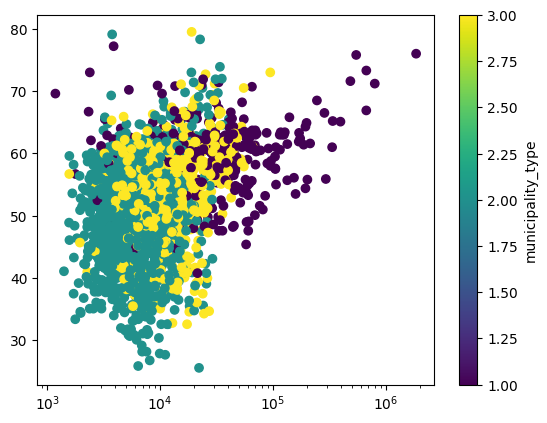

In [86]:
plt.xscale("log")
# plt.scatter(mp['population_total'], mp['percent_vaccinated'])
mp['municipality_type'] = mp['municipality_code']%10
mp_urban = mp[mp['municipality_type']==1]
mp_rural = mp[mp['municipality_type']==2]
mp_mix = mp[mp['municipality_type']==3]
# mp.head()
plt.scatter(mp['population_total'], mp['percent_vaccinated'], c=mp['municipality_type'])
# plt.xlim(0, 500000)

plt.colorbar(label='municipality_type')

#plt.ticklabel_format(scilimits=(-5, 8))


In [109]:
mp_urban['population_total'].corr(mp_urban['percent_vaccinated'])


0.31664422858686264

0.09177532575645278

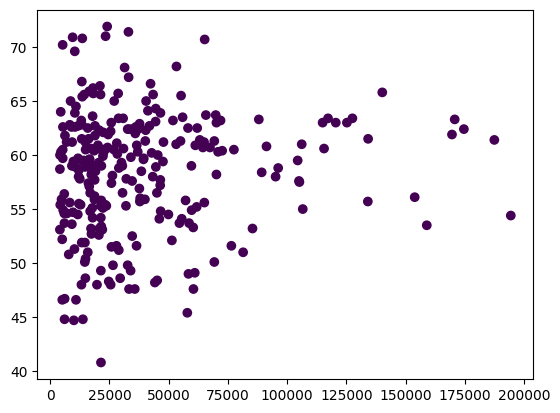

In [113]:
# mp_mix['population_total'].corr(mp_mix['percent_vaccinated'])
q_hi = mp_urban["population_total"].quantile(0.95)
q_low = mp_urban["population_total"].quantile(0.05)
df_filtered = mp_urban[(mp_urban["population_total"] < q_hi) & (mp_urban["population_total"] > q_low)]
# plt.scatter(df_filtered['population_total'], df_filtered['percent_vaccinated'], c=df_filtered['municipality_type'])

df_filtered['population_total'].corr(df_filtered['percent_vaccinated'])


In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Train Test Split
X_train_log, X_test_log, y_train, y_test = train_test_split(np.log(mp_mix['population_total'].values.reshape(-1,1)), mp_mix['percent_vaccinated'].values.reshape(-1,1), test_size=0.2)

y_pred = LinearRegression()
y_pred.fit(X_train_log,y_train)
l_model= y_pred.predict(X_test_log)
from sklearn import metrics


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, l_model))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, l_model) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, l_model)))
print("R^2 Score :          ", metrics.r2_score(y_test, l_model))




Mean Absolute Error: 5.5448559262231765
Mean Squared Error: 53.62106292449204
Root Mean Squared Error: 7.322640433920816
R^2 Score :           0.05348174353711288


In [115]:
predict = np.poly1d(fit)

from sklearn.metrics import r2_score
r2_score(y_test, predict(X_test))

# from sklearn.metrics import accuracy_score
# y_pred = fit.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


# df = pd.merge(mp, ct, on=['county_code','county_code'], how="outer", indicator=True)
# del df['_merge']
# df.describe()
# df.to_csv('out.csv', index=False)


-117391089.00269625

In [85]:
df.describe()

,municipality_code,county_code,percent_vaccinated,population_total,population_total_m,population_total_f,population_0_4_total,population_0_4_total_m,population_0_4_total_f,population_5_9_total,...,average_wage_relative,doctors_per_1000_persons,beds_in_hospitals,cars_per_1000_persons,motorcycles_per_1000_persons,education_share_higher,education_share_secondary,education_share_vocational,education_share_primary,tourits_per_1000_persons
count,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,...,2477,2477,2477,2477,2477,2477,2477,2477,2477,2476
mean,1651197,1651147,52,15377,7435,7942,773,397,376,795,...,84,13,283,673,53,19,34,24,18,436
std,917545,917547,8,52381,24334,28051,2675,1374,1300,2533,...,8,8,420,79,15,4,2,4,3,1004
min,201011,201000,26,1179,582,597,35,20,14,39,...,70,1,0,375,12,13,29,8,8,0
25%,1002043,1002000,48,4783,2393,2378,235,121,114,247,...,79,8,120,620,41,17,32,22,16,104
50%,1433062,1433000,53,7361,3660,3685,384,195,187,404,...,83,12,219,668,52,18,34,24,17,204
75%,2413052,2413000,58,13166,6411,6663,691,354,337,725,...,87,16,344,732,63,20,35,27,20,337
max,3263011,3263000,80,1861774,858762,1003012,100254,51522,48732,95125,...,162,82,12149,1012,138,47,41,35,27,10808
